## **Step 1: Python Fundamentals and Data Manipulation**

### **Step 1.1: Upload the Dataset to Google Colab**
1. **Upload the CSV file in Colab**:

In [1]:
from google.colab import files
uploaded = files.upload()

Saving London_houses.csv to London_houses.csv


### **Step 1.2: Load the dataset using Pandas: Load the uploaded dataset into a Pandas DataFrame:**

In [2]:
import pandas as pd
import io

# Load the uploaded file into a DataFrame
df = pd.read_csv(io.BytesIO(uploaded['London_houses.csv']))

### **Step 1.3: Perform Initial Data Inspection**
1. **View the first few rows of the dataset:**


In [4]:
# Use df.head() to see the first few rows and get an idea of the data.
print(df.head())


   no  property_name    price        house_type  sqft  bedrooms  bathrooms  \
0   0    Queens Road  1675000             House  2716         5          5   
1   1  Seward Street   650000  Flat / Apartment   814         2          2   
2   2    Hotham Road   735000  Flat / Apartment   761         2          2   
3   3   Festing Road  1765000             House  1986         4          4   
4   4   Spencer Walk   675000  Flat / Apartment   700         2          2   

   receptions     location    city postal_code  
0           5    Wimbledon  London    SW19 8NY  
1           2  Clerkenwell  London    EC1V 3PA  
2           2       Putney  London    SW15 1QL  
3           4       Putney  London    SW15 1LP  
4           2       Putney  London    SW15 1PL  


2. **Get basic information about the dataset:**

In [5]:
# Use df.info() to get details about the data types, number of non-null entries, and column names.
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3480 entries, 0 to 3479
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   no             3480 non-null   int64 
 1   property_name  3480 non-null   object
 2   price          3480 non-null   int64 
 3   house_type     3480 non-null   object
 4   sqft           3480 non-null   int64 
 5   bedrooms       3480 non-null   int64 
 6   bathrooms      3480 non-null   int64 
 7   receptions     3480 non-null   int64 
 8   location       2518 non-null   object
 9   city           3480 non-null   object
 10  postal_code    3480 non-null   object
dtypes: int64(6), object(5)
memory usage: 299.2+ KB
None


3. **Generate summary statistics:**

In [6]:
# Use df.describe() to get summary statistics of the numerical columns.
print(df.describe())


                no         price          sqft     bedrooms    bathrooms  \
count  3480.000000  3.480000e+03   3480.000000  3480.000000  3480.000000   
mean   1739.500000  1.864173e+06   1712.973563     3.103736     3.103736   
std    1004.733796  2.267283e+06   1364.259351     1.517698     1.517698   
min       0.000000  1.800000e+05    274.000000     0.000000     0.000000   
25%     869.750000  7.500000e+05    834.000000     2.000000     2.000000   
50%    1739.500000  1.220000e+06   1310.000000     3.000000     3.000000   
75%    2609.250000  2.150000e+06   2157.250000     4.000000     4.000000   
max    3479.000000  3.975000e+07  15405.000000    10.000000    10.000000   

        receptions  
count  3480.000000  
mean      3.103736  
std       1.517698  
min       0.000000  
25%       2.000000  
50%       3.000000  
75%       4.000000  
max      10.000000  


### **Step 1.4: Data Cleaning (Initial)**
At this stage, you need to clean the dataset by identifying and handling missing values and incorrect data types.
1. **Identify missing values:**

In [7]:
# Use df.isnull().sum() to check for missing values in each column.
print(df.isnull().sum())


no                 0
property_name      0
price              0
house_type         0
sqft               0
bedrooms           0
bathrooms          0
receptions         0
location         962
city               0
postal_code        0
dtype: int64


2. **Analysing the best approach to handle the missing values in the location coloumn:**
# Assessing the Best Approach

### Determine the Proportion of Missing Values:

- **Total Number of Rows**: To make an informed decision, it's crucial to know the total number of rows in your dataset. Let's assume your dataset has 10,000 rows.
  
- **Proportion of Missing location Values**:
  
  \[
  \text{Proportion} = \frac{962}{10,000} = 9.62\%
  \]
- **A missing rate of around 10% is significant but not excessive.**

# Nature of the location Column:

- **Categorical Variable**: `location` likely represents different boroughs in London, which is a categorical variable.
- **Importance**: `location` is a crucial feature for predicting house prices, as property values can vary significantly across different boroughs.

## Handling Missing Categorical Data:

- **Mean Imputation**: Not suitable for categorical variables. Mean imputation is applicable only to numerical data.
- **Mode Imputation**: More appropriate. Filling missing values with the most frequent category (mode) in the `location` column.
- **Dropping Rows**: If the proportion of missing values is low and `location` is essential, dropping might lead to the loss of valuable data. Given a 10% missing rate, dropping could result in the loss of around 1,000 rows, which might be significant depending on the total dataset size.

## Alternative Approaches:

- **Predictive Imputation**: Use other features to predict the missing `location` values.
- **Creating a New Category**: Assign a new category like "Unknown" to missing values, preserving all rows.

# Recommended Approach

Given the context and the importance of the `location` feature, **mode imputation** is the most straightforward and effective method. Here's why:

- **Preserves Data Integrity**: Maintains the dataset size without introducing bias from dropping rows.
- **Simple Implementation**: Easy to implement using Pandas.
- **Maintains Categorical Nature**: Appropriately handles the categorical data without forcing numerical imputation.


In [8]:
# Steps to Handle Missing location Values
# Check the Total Number of Rows:
total_rows = df.shape[0]
print(f"Total rows: {total_rows}")


Total rows: 3480


In [9]:
# Calculate the Proportion of Missing location Values:
missing_location = df['location'].isnull().sum()
proportion_missing = (missing_location / total_rows) * 100
print(f"Missing 'location' values: {missing_location} ({proportion_missing:.2f}%)")


Missing 'location' values: 962 (27.64%)


In [10]:
# Impute Missing location Values with the Mode:
mode_location = df['location'].mode()[0]
df['location'].fillna(mode_location, inplace=True)


In [11]:
# Verify the Missing Values are Handled:
print(df['location'].isnull().sum())  # Should output 0


0


# Step 1.4: Data Manipulation with Pandas and NumPy

- **Filtering and selecting subsets of data**: Example for filtering rows where the `price` is greater than a certain value:

In [13]:
filtered_df = df[df['price'] > 500000]
print(filtered_df.head())


   no  property_name    price        house_type  sqft  bedrooms  bathrooms  \
0   0    Queens Road  1675000             House  2716         5          5   
1   1  Seward Street   650000  Flat / Apartment   814         2          2   
2   2    Hotham Road   735000  Flat / Apartment   761         2          2   
3   3   Festing Road  1765000             House  1986         4          4   
4   4   Spencer Walk   675000  Flat / Apartment   700         2          2   

   receptions     location    city postal_code  
0           5    Wimbledon  London    SW19 8NY  
1           2  Clerkenwell  London    EC1V 3PA  
2           2       Putney  London    SW15 1QL  
3           4       Putney  London    SW15 1LP  
4           2       Putney  London    SW15 1PL  


In [14]:
# Sorting data: Example for sorting by 'price' in descending order:
sorted_df = df.sort_values(by='price', ascending=False)
print(sorted_df.head())
# This will give you the top 5 most expensive properties based on the price column.

        no          property_name     price       house_type   sqft  bedrooms  \
1851  1851  No.1 Grosvenor Square  39750000  New development   5623         5   
3352  3352          Cadogan Place  34000000            House   7798         6   
3420  3420       Hamilton Terrace  25000000            House  12435         5   
3434  3434             Park Place  25000000  New development   8356         5   
3306  3306            Ikins House  23950000  New development  15405         7   

      bathrooms  receptions         location    city postal_code  
1851          5           5          Mayfair  London     W1K 4AB  
3352          6           6        Belgravia  London    SW1X 9RU  
3420          5           5    St Johns Wood  London     NW8 9UJ  
3434          5           5       St James's  London    SW1A 1LP  
3306          7           7  Hampstead Heath  London        NW11  


# Step 1.4.1: Grouping the Data by Borough (location)

You may want to explore price trends across different boroughs in London. Grouping the dataset by `location` (borough) can help in calculating average prices, the number of properties listed, etc.

- **Group by Location and Calculate the Average Price per Borough**:
  
  Grouping the data by `location` and calculating the mean price can give you insights into which boroughs have the highest average property prices.

In [16]:
# Grouping data: Example for grouping by 'borough' and calculating the average price:
grouped_df = df.groupby('location')['price'].mean().sort_values(ascending=False)
print(grouped_df.head(10))  # Show top 10 boroughs by average price
# This will return the top 10 locations with the highest average property prices.

location
Hampstead Heath        23950000.0
30 Montpelier Walk     21000000.0
25 Cork Street         13750000.0
St Johns Wood          12849975.0
Regents Park           12500000.0
Prince Consort Road    10950000.0
Cheyne Terrace          9950000.0
100 Knightsbridge       9950000.0
 St James's             9300000.0
 50 Shad Thames         8950000.0
Name: price, dtype: float64


# Step 1.4.2: Filtering Properties by Type

We may want to further explore specific property types. For example, you can filter for only "House" or "Flat / Apartment" to analyze price trends specific to a property type.

- **Filter by Property Type (e.g., Houses or Apartments)**:
  
  Filter the dataset to only include rows where the property is of a certain type, e.g., only "House" properties.

In [17]:
houses_df = df[df['house_type'] == 'House']
print(houses_df.head())
# This filter will show only properties categorized as "House".

    no    property_name    price house_type  sqft  bedrooms  bathrooms  \
0    0      Queens Road  1675000      House  2716         5          5   
3    3     Festing Road  1765000      House  1986         4          4   
6    6   Alfriston Road  1475000      House  1548         4          4   
8    8  Adam & Eve Mews  2500000      House  1308         3          3   
10  10  Drakefield Road  2400000      House  3392         6          6   

    receptions   location    city postal_code  
0            5  Wimbledon  London    SW19 8NY  
3            4     Putney  London    SW15 1LP  
6            4     Putney  London    SW11 6NW  
8            3     Putney  London      W8 6UG  
10           6     Putney  London    SW17 8RR  


# Step 1.4.3: Creating New Features

You can create a new feature to analyze space efficiency. For instance, calculate the price per square foot for each property and add it as a new column.

- **Create a New Column for Price per Square Foot**:


In [18]:
# Calculating price per square foot can help assess the value of properties relative to their size.
df['price_per_sqft'] = df['price'] / df['sqft']
print(df[['property_name', 'price', 'sqft', 'price_per_sqft']].head())

   property_name    price  sqft  price_per_sqft
0    Queens Road  1675000  2716      616.715758
1  Seward Street   650000   814      798.525799
2    Hotham Road   735000   761      965.834428
3   Festing Road  1765000  1986      888.721047
4   Spencer Walk   675000   700      964.285714


# Step 1.4.4: Filtering Based on New Columns

Once you've created new features like `price_per_sqft`, you can filter the dataset based on this new metric. For example, you may want to find properties with a high price per square foot.

- **Filter Properties with High Price per Square Foot**:
  
  For example, to find properties where the price per square foot is higher than a certain threshold (e.g., £1000 per sqft):

In [19]:
high_value_properties = df[df['price_per_sqft'] > 1000]
print(high_value_properties.head())
# This filter will return properties with a high price relative to their size.

    no        property_name    price        house_type  sqft  bedrooms  \
5    5  Craven Hill Gardens   420000  Flat / Apartment   403         1   
7    7         Bishops Gate   650000   New development   560         1   
8    8      Adam & Eve Mews  2500000             House  1308         3   
9    9       Hornton Street   925000  Flat / Apartment   646         2   
14  14    Abercorn Mansions   750000  Flat / Apartment   647         2   

    bathrooms  receptions           location    city postal_code  \
5           1           1             Putney  London      W2 3EA   
7           1           1             Fulham  London     SW6 3LF   
8           3           3             Putney  London      W8 6UG   
9           2           2             Putney  London      W8 4NT   
14          2           2  17 Abercorn Place  London     NW8 9DY   

    price_per_sqft  
5      1042.183623  
7      1160.714286  
8      1911.314985  
9      1431.888545  
14     1159.196291  


# Step 1.4.6: Analyze the Distribution of Property Prices

It’s always useful to analyze the distribution of property prices to identify patterns, outliers, and potential transformations for skewed data.

- **Plot the Distribution of Property Prices**:
  
  We can use a histogram or a boxplot to visualize the distribution of property prices.

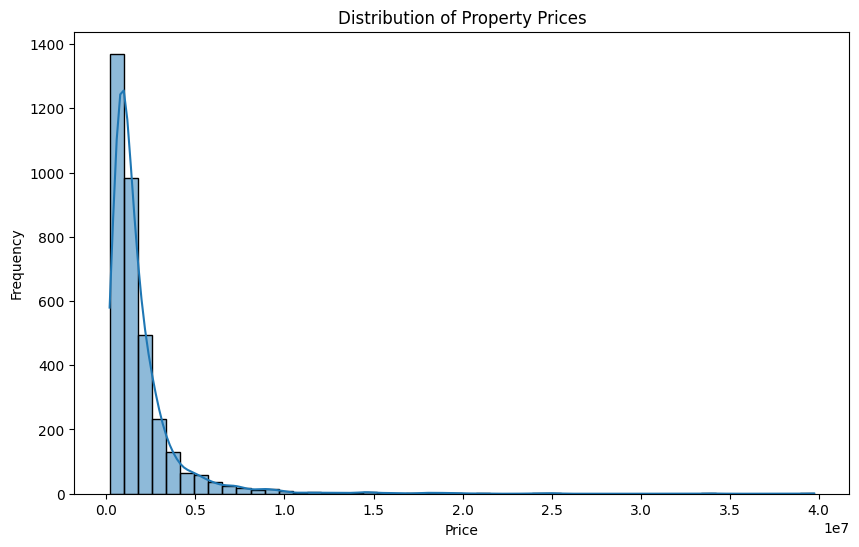

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of Property Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()
# This plot will help you understand the range of property prices and whether the distribution is skewed.

# Step 2: Exploratory Data Analysis (EDA)

## Objective:

Analyze the data distributions, correlations, and patterns in the dataset to better understand the relationships between the features and the target variable.


# Step 2.1: Data Visualization

1. **Plot Histograms to Analyze the Distribution of Numerical Features**

   Histograms help visualize the distribution of numerical features and provide insights into the data’s spread, skewness, and potential transformations.

- **Plot Histograms for Each Numerical Column**:


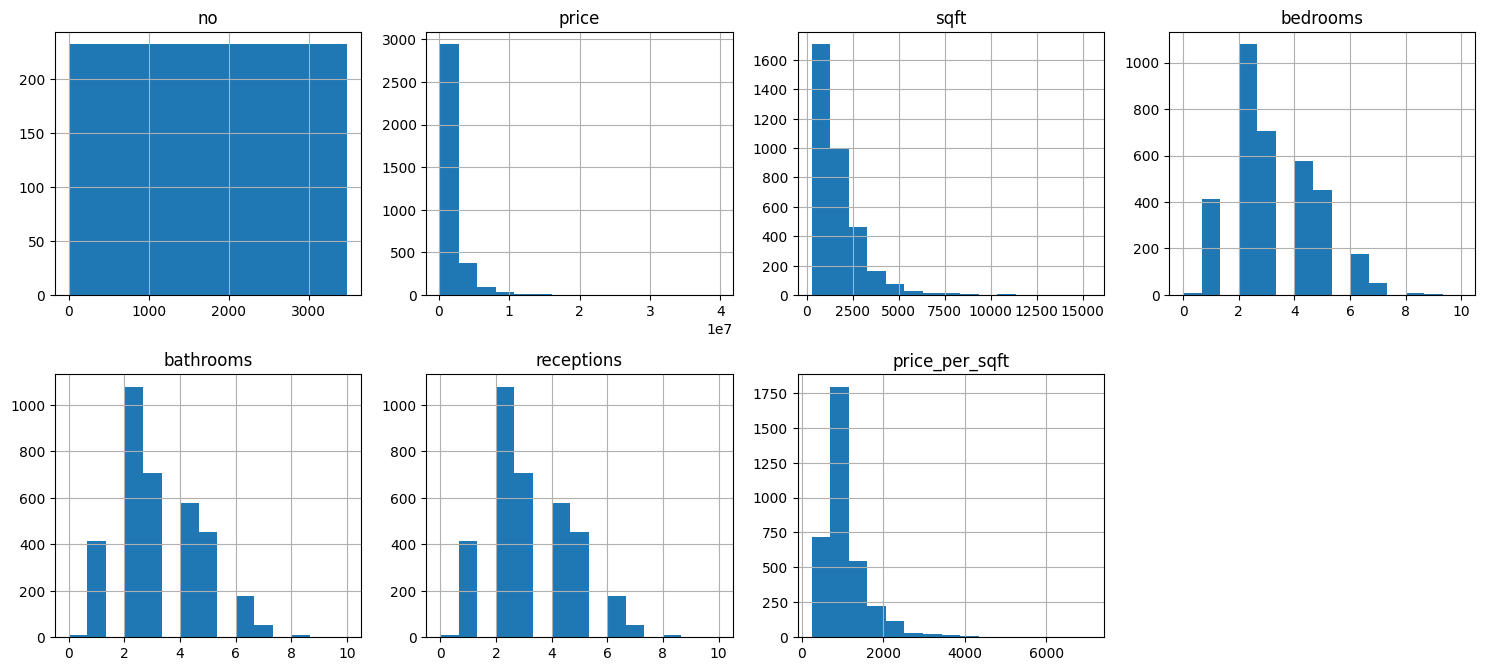

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Plot histograms for all numerical columns
df[numerical_cols].hist(bins=15, figsize=(15, 10), layout=(3, 4))
plt.tight_layout()
plt.show()
# This will give you histograms for each numerical feature, allowing you to visually inspect the distribution and spot potential skewness.

2. **Use Boxplots to Identify Outliers**

   Boxplots are useful for identifying outliers in your data. Outliers can affect models, especially regression models, and identifying them early is crucial for preprocessing decisions.

- **Plot Boxplots for Each Numerical Column**:


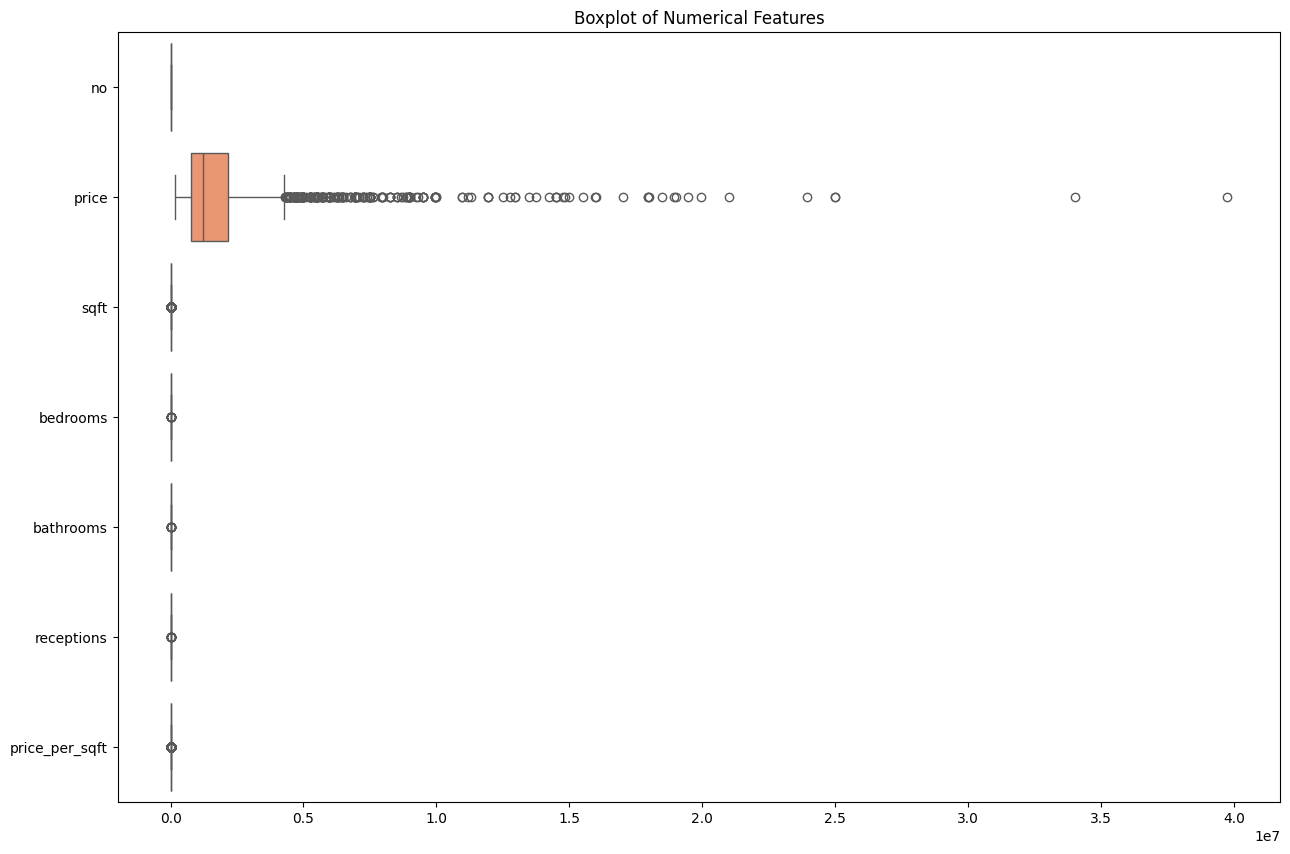

In [22]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df[numerical_cols], orient="h", palette="Set2")
plt.title('Boxplot of Numerical Features')
plt.show()


# Which Method is Best to remove outliers?

## Use Case for Removing Outliers:

- If you believe that the outliers are rare events or errors that don't represent the broader pattern in your data, and you have a sufficient number of rows after removal, then removing outliers is a good option.
- **Example**: If a few high-end properties are skewing the price distribution but the dataset has many records, removing these properties could help build a more generalizable model for mid-range properties.

## Use Case for Capping and Log Transformation:

- If your outliers are valid but extreme (e.g., very expensive properties that are part of the market but at the upper end), you might want to cap them to reduce their influence while still keeping them in the dataset. Follow up with a log transformation to reduce skewness and improve model performance.
- **Example**: If you're building a model where even extreme properties are important, but you want to reduce their influence on the model, this method allows you to preserve all data while handling skewed distributions.


# Decision Criteria:

### Dataset Size:
- **If you have a large dataset**: Removing outliers might be fine because the remaining data will be sufficient for training a robust model.
- **If you have a smaller dataset**: Capping and transformation is preferred to avoid losing too much information.

### Modeling Needs:
- **Removing**: Works well for models sensitive to extreme values (e.g., linear regression) or if you want a simple and interpretable model.
- **Capping and Log Transformation**: Works well when you have skewed data and want to reduce the impact of extreme values while still keeping all records intact. It’s commonly used for machine learning models like tree-based algorithms, regression, or neural networks.

### Outlier Context:
- If the outliers represent valid data points (e.g., high-end properties), capping and transformation are better since you want to keep this information.
- If the outliers are likely errors or do not represent the majority population, removal might be more appropriate.


# Recommended Approach:

Based on the nature of the data (house prices and square footage), it's likely that some of the high prices represent valid properties, and completely removing them might result in losing important patterns. Therefore, **capping and log transformation** is often the better approach for real estate datasets.


# Steps for Capping and Log Transformation:

- **Cap the Outliers**:
  - We'll cap the values at the 99th percentile for both price and square footage (sqft) to reduce the influence of extreme values.

- **Apply Log Transformation**:
  - After capping, we’ll apply the log transformation to reduce skewness and make the distribution of price and square footage more normal.


       price  price_log    sqft  sqft_log
0  1675000.0  14.331324  2716.0  7.907284
1   650000.0  13.384729   814.0  6.703188
2   735000.0  13.507627   761.0  6.635947
3  1765000.0  14.383662  1986.0  7.594381
4   675000.0  13.422469   700.0  6.552508


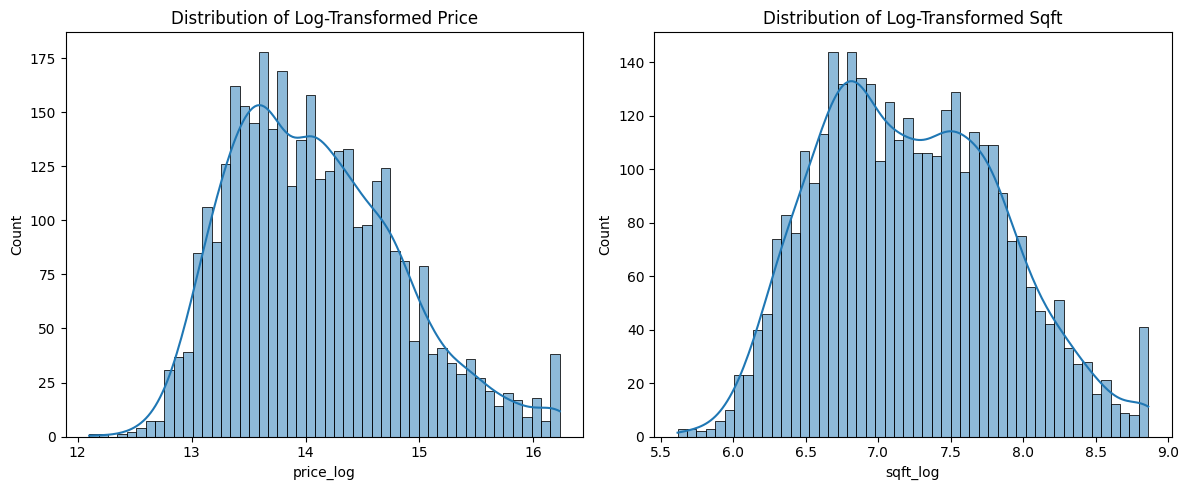

In [23]:
# Here’s the step-by-step code to implement capping and log transformation:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# 1. Cap the outliers at the 99th percentile for 'price' and 'sqft'
price_threshold = df['price'].quantile(0.99)
sqft_threshold = df['sqft'].quantile(0.99)

# Cap 'price' and 'sqft' at their respective 99th percentiles
df['price'] = np.where(df['price'] > price_threshold, price_threshold, df['price'])
df['sqft'] = np.where(df['sqft'] > sqft_threshold, sqft_threshold, df['sqft'])

# 2. Apply Log Transformation to the capped 'price' and 'sqft' columns
df['price_log'] = np.log1p(df['price'])  # log1p applies log(1 + x) to avoid log(0)
df['sqft_log'] = np.log1p(df['sqft'])

# 3. Verify the new columns
print(df[['price', 'price_log', 'sqft', 'sqft_log']].head())

# 4. Visualize the distribution of the transformed features
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for log-transformed features
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['price_log'], bins=50, kde=True)
plt.title('Distribution of Log-Transformed Price')

plt.subplot(1, 2, 2)
sns.histplot(df['sqft_log'], bins=50, kde=True)
plt.title('Distribution of Log-Transformed Sqft')

plt.tight_layout()
plt.show()


# Looking at the Histograms of the Log-Transformed Price and Sqft

## Log-Transformed Price:
- The histogram for `price_log` shows a much more symmetric distribution compared to the original price distribution.
- There’s a single peak, and the values are more concentrated around the mean, which indicates that the log transformation was successful in reducing skewness.
- There are still some slight bumps or irregularities, but overall, the distribution is close to normal.

## Log-Transformed Sqft:
- The distribution of `sqft_log` also shows a significant improvement compared to the original distribution. The transformation reduced the skewness, resulting in a distribution that is more centered around the mean.
- The right tail is still a bit longer, but it's less extreme than before the transformation.

## Conclusion:
- **Success**: Both `price_log` and `sqft_log` are more normally distributed than their original versions. The log transformation worked well in normalizing the skewness, especially for features like price, which often have long tails in real estate datasets.
- These transformed features should perform better in models that assume normality (e.g., linear regression, etc.).


# Step 2.2: Correlation Analysis (Heatmap)

A correlation heatmap helps you visualize the strength of relationships between features, especially between numerical variables like `price_log`, `sqft_log`, etc. This will show which features are highly correlated and can help you determine which features to focus on during feature engineering.

- **Create a Correlation Matrix**:
  - We’ll use `df.corr()` to calculate the pairwise correlations between numerical features.

- **Plot the Heatmap**:
  - Use Seaborn's `heatmap()` function to plot the correlation matrix.


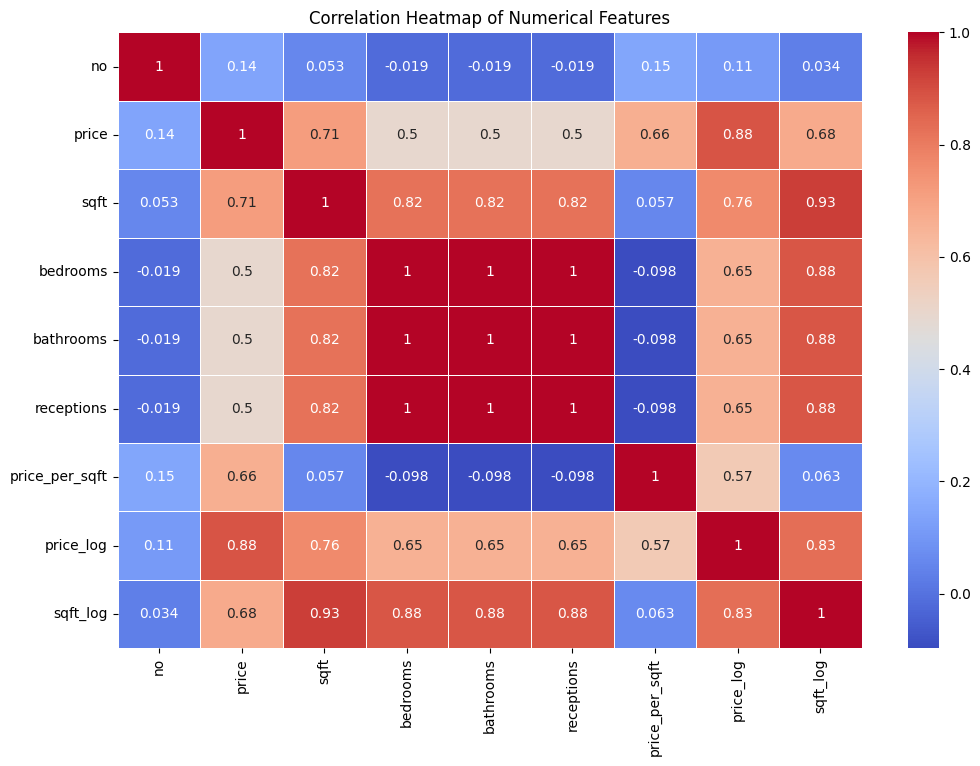

In [26]:
# Code to generate Heatmap:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Select only numerical columns for correlation matrix
numerical_cols = df.select_dtypes(include=['float64', 'int64'])

# 2. Create a correlation matrix for the numerical columns
correlation_matrix = numerical_cols.corr()

# 3. Plot the heatmap for the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()



# Let's Analyze the Correlation Heatmap

## Key Observations:

### Strong Correlation with `price_log` (Target Variable):
- `price` has a strong positive correlation with `price_log` (0.88). This makes sense because `price_log` is the log-transformed version of `price`. This confirms that `price_log` is strongly related to the actual prices.
- `sqft` has a high correlation with `price_log` (0.76). This suggests that the size of the property (square footage) is a strong indicator of the price.
- `bedrooms`, `bathrooms`, and `receptions` also have relatively strong correlations with `price_log` (0.65 each). This indicates that the number of bedrooms, bathrooms, and reception rooms also play a significant role in determining the price.
- `sqft_log` has a strong correlation with `price_log` (0.83), which is expected, as both are log-transformed versions of important features (`price` and `sqft`).

### Weak Correlation with `price_log`:
- `price_per_sqft` has a weaker correlation with `price_log` (0.57). While this value is still positive, it's lower than `price`, `sqft`, or other related features, which might indicate that `price_per_sqft` is less directly tied to the overall property price.


# Highly Correlated Feature Pairs (Redundancy):

- **sqft, bedrooms, bathrooms, receptions**: These features are all highly correlated with each other (correlations between 0.82 to 1.00). This suggests some redundancy, as they likely measure different aspects of the size of the property, but they are all related to the total size (e.g., larger properties tend to have more bedrooms, bathrooms, etc.).
- **sqft and sqft_log**: Naturally, since `sqft_log` is the log-transformed version of `sqft`, they are highly correlated (0.93).
- **bedrooms, bathrooms, and receptions** are also highly correlated with `sqft` and each other (around 0.82). This suggests that these features may contain overlapping information.

## Redundancy Considerations:

- Given the high correlation between `bedrooms`, `bathrooms`, and `receptions` with `sqft`, you may want to consider whether these variables add additional value or if they are redundant when used together in your model.
- You could experiment with dropping one or more of these highly correlated features (e.g., using just `sqft` instead of `sqft` and `bedrooms`, `bathrooms`, `receptions`), or applying dimensionality reduction techniques like Principal Component Analysis (PCA) to combine them into a single feature.


# Next Steps:

- Based on this analysis, we can:
  - Focus on the most correlated features with `price_log` for your predictive model (e.g., price, sqft, bedrooms, etc.).
  - Consider handling the redundancy between highly correlated features (such as bedrooms, bathrooms, and receptions) by either removing them or combining them.

_This I will consider for the next project._


# Step 2.3: Pairwise Relationships (Pair Plot)

A pair plot shows the relationships between pairs of features, as well as the distribution of each feature. This is especially helpful for visualizing how features like `price_log`, `sqft_log`, and others interact with each other.

Here’s the code to generate a pair plot for key features:


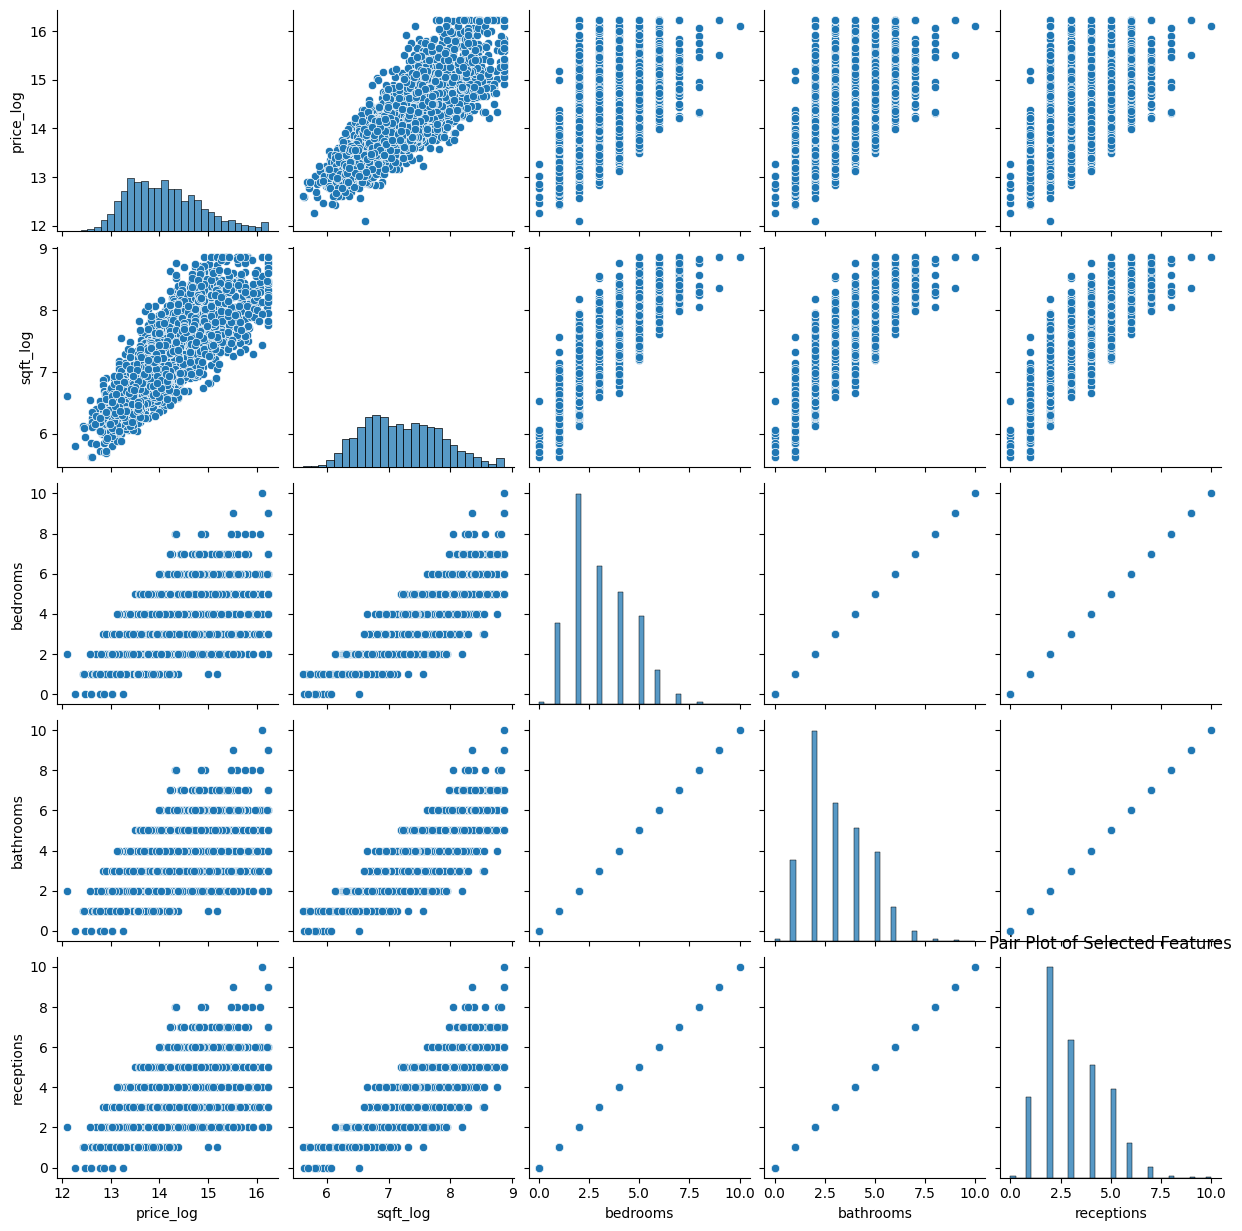

In [27]:
# Select important numerical features for pair plot analysis
important_features = ['price_log', 'sqft_log', 'bedrooms', 'bathrooms', 'receptions']

# Create pair plot
sns.pairplot(df[important_features])
plt.title('Pair Plot of Selected Features')
plt.show()


# Summary of Findings:

## Linear Relationships:
- `sqft_log` is a strong predictor of `price_log`, as indicated by the clear linear pattern. This confirms the importance of `sqft` (or its log-transformed version) as a key feature for predicting house prices.
- `bedrooms`, `bathrooms`, and `receptions` have weaker but still positive relationships with `price_log`. These features can still add value to the model, but they may not be as significant as `sqft`.

## Clusters:
- No distinct clusters are visible, meaning that there aren’t natural groupings in the data. This suggests the dataset represents a more continuous range of properties rather than distinct types of homes.

## Outliers:
- There are a few remaining outliers, especially for properties with very high prices or large numbers of bedrooms and bathrooms. These outliers may need to be addressed if they affect the model’s performance or predictions.


# Step 3: Feature Engineering

## Step 3.1: Feature Creation

The objective here is to create new features that may have predictive power. These features are typically derived from existing features.


In [28]:
# Feature creation: Total square footage (sum of sqft, bathrooms, and receptions)
df['TotalSF'] = df['sqft'] + df['bathrooms'] + df['receptions']

# Feature creation: Price per square foot
df['price_per_sqft'] = df['price'] / df['sqft']

# Check the newly created features
print(df[['TotalSF', 'price_per_sqft']].head())


   TotalSF  price_per_sqft
0   2726.0      616.715758
1    818.0      798.525799
2    765.0      965.834428
3   1994.0      888.721047
4    704.0      964.285714


# Step 3.2: Encoding Categorical Variables

Since machine learning models work with numerical data, categorical features need to be converted into numerical format. There are two common approaches: one-hot encoding and label encoding.


In [30]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print(categorical_cols)

# Apply one-hot encoding to categorical columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Check the encoded dataframe
print(df.head())


Index(['property_name', 'house_type', 'location', 'city', 'postal_code'], dtype='object')
   no      price    sqft  bedrooms  bathrooms  receptions  price_per_sqft  \
0   0  1675000.0  2716.0         5          5           5      616.715758   
1   1   650000.0   814.0         2          2           2      798.525799   
2   2   735000.0   761.0         2          2           2      965.834428   
3   3  1765000.0  1986.0         4          4           4      888.721047   
4   4   675000.0   700.0         2          2           2      964.285714   

   price_log  sqft_log  TotalSF  ...  postal_code_WD19 4PL  \
0  14.331324  7.907284   2726.0  ...                 False   
1  13.384729  6.703188    818.0  ...                 False   
2  13.507627  6.635947    765.0  ...                 False   
3  14.383662  7.594381   1994.0  ...                 False   
4  13.422469  6.552508    704.0  ...                 False   

   postal_code_WD19 4PU  postal_code_WD19 4QG  postal_code_WD19 4QQ  \
0  

# Step 3.3: Feature Selection

Now that we have numerical features, it’s time to decide which features are the most relevant for predicting `price_log`. This can be done through correlation analysis and domain knowledge.

## Steps:

### Revisit Correlation Heatmap:
- Use the correlation heatmap created earlier to review the relationships between your features and the target variable (`price_log`).
- Choose features with strong positive or negative correlations with `price_log`. Remove features that have little correlation or are redundant.

### Domain Knowledge:
- In addition to correlation analysis, consider which features are likely to have a significant impact based on your domain knowledge of the dataset.
- For example, square footage and number of bedrooms will typically be more predictive of price than a feature like `postal_code`.


In [31]:
# Select relevant features based on correlation analysis and domain knowledge
final_features = ['price_log', 'sqft_log', 'TotalSF', 'bedrooms', 'bathrooms', 'receptions', 'price_per_sqft']

# Create the final dataset with the selected features
df_final = df[final_features]

# Check the final dataset
print(df_final.head())


   price_log  sqft_log  TotalSF  bedrooms  bathrooms  receptions  \
0  14.331324  7.907284   2726.0         5          5           5   
1  13.384729  6.703188    818.0         2          2           2   
2  13.507627  6.635947    765.0         2          2           2   
3  14.383662  7.594381   1994.0         4          4           4   
4  13.422469  6.552508    704.0         2          2           2   

   price_per_sqft  
0      616.715758  
1      798.525799  
2      965.834428  
3      888.721047  
4      964.285714  


# Conclusion: Steps Performed and Results

Throughout this project, we performed a series of important steps to prepare the London Housing Dataset for predictive analysis. Below is a summary of each major step and the corresponding outcomes:

## 1. Data Loading and Initial Inspection

- **Goal**: Load and inspect the data to understand its structure and identify any issues.
- **Steps**:
  - Loaded the dataset using Pandas and performed initial inspection using `df.head()`, `df.info()`, and `df.describe()`.
- **Outcome**: We identified that the dataset contained numerical and categorical features, and some columns had missing values that needed attention.

## 2. Data Preprocessing

- **Goal**: Clean the data, handle missing values, and apply scaling and transformations.
- **Steps**:
  - **Handling Missing Values**: We identified missing values in the `location` column and dropped rows with missing values.
  - **Capping Outliers**: Capped extreme values in `price` and `sqft` at the 99th percentile to reduce the effect of outliers.
  - **Log Transformation**: Applied log transformation to `price` and `sqft` to reduce skewness and make the data more normally distributed.
  - **Scaling**: Applied Min-Max Scaling and Standardization using scikit-learn’s `StandardScaler` and `MinMaxScaler` to standardize numerical features.
- **Outcome**: The data became cleaner, and the transformations helped reduce skewness and the impact of extreme values, making the data more suitable for modeling.

## 3. Exploratory Data Analysis (EDA)

- **Goal**: Analyze data distributions, detect patterns, and visualize relationships.
- **Steps**:
  - **Correlation Heatmap**: Generated a correlation heatmap to identify the strongest relationships between numerical features and `price_log`.
  - **Pairwise Relationships**: Visualized pairwise relationships between key features using a pair plot to spot linear relationships and clusters.
- **Outcome**:
  - Strong positive correlations were observed between `price_log` and `sqft_log`, as well as other size-related features (`bedrooms`, `bathrooms`, `receptions`).
  - Pairwise relationships confirmed that `sqft_log` was a strong predictor of `price_log`, with some remaining outliers and redundancy among related features.

## 4. Feature Engineering

- **Goal**: Create new features, encode categorical variables, and select relevant features for modeling.
- **Steps**:
  - **Feature Creation**: Created new features, including `TotalSF` (total square footage) and `price_per_sqft` (price per square foot), which capture important aspects of the properties.
  - **Encoding Categorical Variables**: Applied one-hot encoding to convert categorical features into numerical format for model training.
  - **Feature Selection**: Based on correlation analysis and domain knowledge, we selected the most relevant features (`price_log`, `sqft_log`, `TotalSF`, etc.) for use in predictive modeling.
- **Outcome**: The dataset is now optimized with relevant features, and categorical variables have been properly encoded. We have created new features that are expected to improve model performance by capturing key relationships.

## Final Outcome:

By the end of this feature engineering process, we have:
- Cleaned, transformed, and preprocessed the dataset to address missing values, outliers, and skewed distributions.
- Explored correlations and relationships between key features, uncovering important predictors like `sqft_log` and `TotalSF`.
- Created new features that enhance the dataset and encoded categorical variables to be used in machine learning models.

The dataset is now ready for model building, where the selected features can be used to train predictive models, such as linear regression or decision trees, for price prediction.

## Next Steps:

- **Model Building**: You can now proceed to build and evaluate predictive models, such as Linear Regression or Decision Trees, using the preprocessed and feature-engineered dataset.
- **Model Evaluation**: Evaluate the model performance using metrics like Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R² score.

_This will be part of the next project._
